# Predikcia ochorenie stitnej zlazy

-----

## Hypoteza 1
Ked ma pacient zvysene hodnoty T3, T4U aj TSH budeme povazovat ze ma problem zo stitnou zlazou

## Hypoteza 2
Ked je goitre true, mozes mat problem zo stitnou zlazou

In [149]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.options.display.width = None

In [3]:
data_personal = pd.read_csv("data/personal_train.csv")
data_other = pd.read_csv("data/other_train.csv")

In [4]:
data_personal.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02
1,1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00
2,2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09
3,3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00
4,4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15


In [5]:
data_other.head()

,Unnamed: 0,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,...,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
0,0,Latonya Wilhelm,"397 Joshua Forge Suite 012\nEast Ericburgh, WV...",f,11th,f,NaN,NaN,0.0,0.0,...,F,"{'TSH measured':'f','query hyperthyroid':'f','...",f,other,7.0,Machine-op-inspct,f,?,White,f
1,1,Stacy Martinson,"59472 Brian Views Apt. 885\nKeithhaven, KS 03608",t,11th,f,124.0,1.04,0.0,0.0,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",f,other,7.0,Other-service,f,?,White,f
2,2,Linda Derby,Unit 5333 Box 7103\nDPO AA 03763,t,HS-grad,f,60.0,1.04,0.0,0.0,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,9.0,Priv-house-serv,f,?,Black,f
3,3,Albert Cipriano,"38302 Bradshaw Rue\nNorth Hannahshire, NC 34515",t,Bachelors,f,101.0,0.81,0.0,0.0,...,FALSE,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,13.0,Exec-managerial,f,?,White,f
4,4,David Cook,"7984 Jason Motorway Suite 440\nNelsonville, OK...",t,Some-college,f,89.0,0.83,0.0,0.0,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,other,10.0,Exec-managerial,f,?,White,f


In [13]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 6 columns):
Unnamed: 0       2237 non-null int64
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 104.9+ KB


In [10]:
data_personal.describe(include='all')

,Unnamed: 0,name,address,age,sex,date_of_birth
count,2237.000000,2237,2237,2236.000000,2237,2236
unique,NaN,2236,2237,NaN,3,2196
top,NaN,Terry Murphy,USS Weeks\nFPO AP 30300,NaN,F,1965-09-01
freq,NaN,2,1,NaN,1448,2
mean,1118.000000,NaN,NaN,51.822004,NaN,NaN
std,645.910598,NaN,NaN,20.884439,NaN,NaN
min,0.000000,NaN,NaN,1.000000,NaN,NaN
25%,559.000000,NaN,NaN,36.000000,NaN,NaN
50%,1118.000000,NaN,NaN,54.000000,NaN,NaN
75%,1677.000000,NaN,NaN,67.000000,NaN,NaN


Vidime ze mame tam column Unnamed 0, ktory je vlastne index poradia daneho pozorovania, ktore nam poksytuje defaulte dataframe z pandas, cize mozme tento stlpec zotriet

In [30]:
data_personal.drop(['Unnamed: 0'], axis=1)

,name,address,age,sex,date_of_birth
0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02
1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00
2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09
3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00
4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15
5,Margaret Chabot,"1781 Meredith Skyway Suite 328\nCordovaburgh, ...",63.0,F,1955-05-22
6,James Wilson,"2415 Elizabeth Knoll Suite 030\nCordovafort, C...",70.0,M,1948-05-03
7,Roy Wilson,"49824 Kim View\nWest Ericborough, VT 42457",54.0,?,1964-06-07
8,Colleen Satterwhite,"53231 Matthew Spur Apt. 079\nNorth Brian, MA 3...",48.0,F,1970-06-07 00:00:00
9,Judy Smith,USNV Gallegos\nFPO AA 99743,55.0,F,1963-06-02


In [15]:
data_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 35 columns):
Unnamed: 0            2287 non-null int64
name                  2287 non-null object
address               2287 non-null object
FTI measured          2280 non-null object
education             2279 non-null object
lithium               2278 non-null object
TT4                   2126 non-null float64
T4U                   2039 non-null float64
capital-loss          2281 non-null float64
capital-gain          2279 non-null float64
on thyroxine          2272 non-null object
tumor                 2276 non-null object
TSH                   2038 non-null float64
T3                    1804 non-null float64
fnlwgt                2277 non-null float64
hours-per-week        2276 non-null float64
relationship          2278 non-null object
thyroid surgery       2283 non-null object
workclass             2109 non-null object
I131 treatment        2278 non-null object
class                 2280

# Uzitocne informacie o jednotlivych atributoch
- I131 treatment: radioaktivna terapia pre overactive stitnu zlazu
- goitre: swelling in the neck (napuchnutie stitnej zlaze)
- TSH/T3/T4U: hormony produkujuce stitnou zlazou
- capital-loss/gain: prijem z investicnych zdrojov
- fnlwgt: sampling weight nad hore vysssich atributov
- class: nejake divne hodnoty nasledujuce odelene | a nasledovane hodnotami (negative, positive)
- on thyroxine: ci prijma hormon T4U
- TGB: plazma protein ktory viaze thyroxin v krvi

## Poznamka
- Prilis vela T4 thyroxine, sposobuje goitre
- Vacsina atributov obsahujuce T/F hodnoty, maju aj jednu hodnotu s cislom, ktoru bude treba spracovat
- Atribut 'hypopituitary' obsahuje vsetky hodnoty FALSE (mozne ho vyhodit?)
- Date-of-birth je nekonzistentny
- Medical-info JSON stlpec (mozno rozdelit do dalsich stlpcov)

In [9]:
data_other.describe(include='all')

,Unnamed: 0,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,...,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
count,2287.000000,2287,2287,2280,2279,2278,2126.000000,2039.000000,2281.000000,2279.000000,...,2279,2280,2274,2278,2056.000000,2279,2276,2280,2280,2276
unique,NaN,2236,2237,3,24,3,NaN,NaN,NaN,NaN,...,6,539,3,10,NaN,14,2,1,5,3
top,NaN,Christian Ortega,"1058 Matthew Forges\nChristopherland, KS 28828",t,HS-grad,f,NaN,NaN,NaN,NaN,...,f,"{'TSH measured':'f','query hyperthyroid':'f','...",t,other,NaN,Adm-clerical,f,?,White,f
freq,NaN,3,3,2043,634,2266,NaN,NaN,NaN,NaN,...,2023,109,1797,1177,NaN,390,2275,2280,1891,2241
mean,1143.000000,NaN,NaN,NaN,NaN,NaN,109.462088,0.996436,194.064007,817.727512,...,NaN,NaN,NaN,NaN,10.050584,NaN,NaN,NaN,NaN,NaN
std,660.344355,NaN,NaN,NaN,NaN,NaN,35.879295,0.191213,9116.985776,5971.192914,...,NaN,NaN,NaN,NaN,2.494250,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000,0.310000,-200100.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,571.500000,NaN,NaN,NaN,NaN,NaN,88.000000,0.880000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN
50%,1143.000000,NaN,NaN,NaN,NaN,NaN,104.000000,0.980000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN
75%,1714.500000,NaN,NaN,NaN,NaN,NaN,126.000000,1.080000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN


Podobne aj pri tomto datasete

In [31]:
data_other.drop(['Unnamed: 0'], axis=1)

,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,...,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
0,Latonya Wilhelm,"397 Joshua Forge Suite 012\nEast Ericburgh, WV...",f,11th,f,NaN,NaN,0.0,0.0,f,...,F,"{'TSH measured':'f','query hyperthyroid':'f','...",f,other,7.0,Machine-op-inspct,f,?,White,f
1,Stacy Martinson,"59472 Brian Views Apt. 885\nKeithhaven, KS 03608",t,11th,f,124.0,1.04,0.0,0.0,t,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",f,other,7.0,Other-service,f,?,White,f
2,Linda Derby,Unit 5333 Box 7103\nDPO AA 03763,t,HS-grad,f,60.0,1.04,0.0,0.0,f,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,9.0,Priv-house-serv,f,?,Black,f
3,Albert Cipriano,"38302 Bradshaw Rue\nNorth Hannahshire, NC 34515",t,Bachelors,f,101.0,0.81,0.0,0.0,f,...,FALSE,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,13.0,Exec-managerial,f,?,White,f
4,David Cook,"7984 Jason Motorway Suite 440\nNelsonville, OK...",t,Some-college,f,89.0,0.83,0.0,0.0,f,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,other,10.0,Exec-managerial,f,?,White,f
5,Alfred Blanton,"969 Kimberly Keys\nNew Michelle, GA 63155",t,HS-grad,f,103.0,0.97,0.0,0.0,f,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,9.0,Machine-op-inspct,f,?,White,f
6,April Vasquez,"8366 Jonathan Stravenue\nBrownmouth, LA 73401",t,Masters,f,140.0,1.10,0.0,0.0,t,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,Other,14.0,Prof-specialty,f,?,Asian-Pac-Islander,f
7,Bret Spearman,Unit 6141 Box 9098\nDPO AE 90667,f,Some-college,f,NaN,NaN,1740.0,0.0,f,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",f,Other,NaN,Adm-clerical,f,?,White,f
8,Eboni Ellison,"948 Howell Junctions Apt. 834\nGarciafurt, SC ...",t,HS-grad,f,116.0,1.14,0.0,0.0,f,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,9.0,Other-service,f,?,White,f
9,Scott Smith,"42571 Ashley Groves Suite 467\nPort Stephen, V...",t,Bachelors,f,94.0,1.14,0.0,0.0,f,...,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,13.0,Adm-clerical,f,?,White,f


#### Ideme preskumat atribut 'age'

/Users/edvin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/edvin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


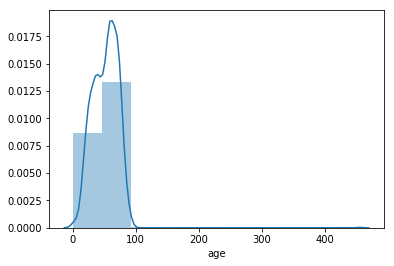

In [41]:
sns.distplot(data_personal['age'].dropna(), bins=10)

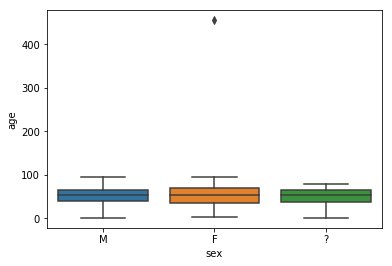

In [19]:
sns.boxplot(y="age", x="sex", data=data_personal)

Vidime ze jedna hodnota je az moc vychylena a budeme ju musiet upravit pouzijuc 95 alebo 5 percentny kvartil.

#### Preskupame atribut 'sex'

In [22]:
data_personal['sex'].value_counts()

F    1448
M     701
?      88
Name: sex, dtype: int64

In [24]:
data_personal[data_personal['sex'] == '?'].head()

,Unnamed: 0,name,address,age,sex,date_of_birth
7,7,Roy Wilson,"49824 Kim View\nWest Ericborough, VT 42457",54.0,?,1964-06-07
15,15,Ronald Speigel,"509 Antonio Haven Suite 117\nWest Ricky, OK 35203",72.0,?,1946-10-06
44,44,John Short,"4081 Montoya Points\nDavidside, WA 68358",31.0,?,1986-10-29
95,95,Carl Dellosso,"794 Ho Island\nEast Anitamouth, ME 91583",38.0,?,1980-05-20
99,99,Dennis Neese,"6051 Jennings Mount\nSandraland, WI 13559",30.0,?,1988-08-06


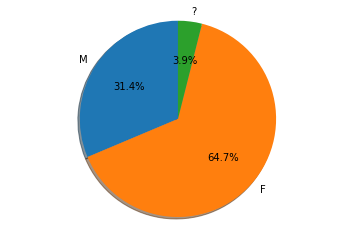

In [26]:
labels = 'M', 'F', '?'
sizes = [len(data_personal[data_personal['sex']=='M'].dropna()), len(data_personal[data_personal['sex']=='F'].dropna()), len(data_personal[data_personal['sex']=='?'].dropna())]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Z piechartu nam je jasne ze v datasete 'data_personal' sa nachadzaju viac zien ako muzov a par ludi nemaju pohlavie vyplnene, co asi bude treba doplnit v predspracovani nasledovne:

- Bud pouzijuc najcastejsiu hodnotu, cize F
- Alebo natrenovat nejaku linearnu regresiu, alebo kNN aby nam dala chybajuce hodnoty a hodnoty namiesto ?

#### Atribut 'date_of_birth'

In [27]:
data_personal['date_of_birth'] = data_personal['date_of_birth']

array(['94-05-02', '1974-04-29 00 00 00', '1962-06-09', ..., '1983-08-14',
       '1932-06-13', '1937/03/19'], dtype=object)

Nekonzistetne hodnoty v zapisu datumu narodenia, bude ich treba upravit na jeden format

-------

In [35]:
data_other['FTI measured'].value_counts()

t      2043
f       236
t.4       1
Name: FTI measured, dtype: int64

Premapovat hodnoty na binarne hodnoty

In [36]:
data_other['lithium'].value_counts()

f      2266
t        11
f.9       1
Name: lithium, dtype: int64

Premapovat hodnoty na binarne hodnoty

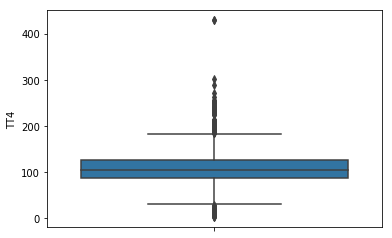

In [44]:
sns.boxplot(y="TT4", data=data_other)

Odstranit outlayeri alebo nahradenit vychylene hodnoty hranicnymi hodnotami.

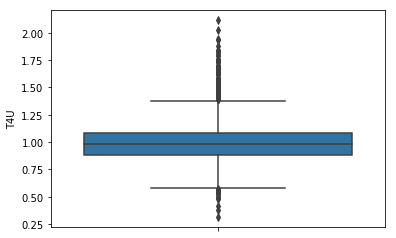

In [45]:
sns.boxplot(y="T4U", data=data_other)

Odstranit outlayeri alebo nahradenit vychylene hodnoty hranicnymi hodnotami.

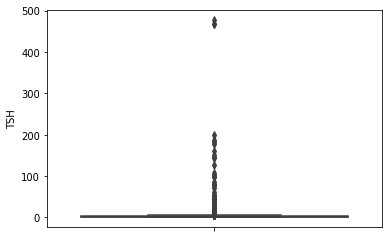

In [46]:
sns.boxplot(y="TSH", data=data_other)

In [121]:
data_other['TSH'].describe()

count    2038.000000
mean        4.691447
std        22.630656
min         0.005000
25%         0.440000
50%         1.400000
75%         2.600000
max       478.000000
Name: TSH, dtype: float64

!!! Nahradit vychylene hodnoty hranicnymi hodnotami !!

#### Vidime aj v pripade tychto 3 atributov, ze mame vela outlinerov, ktore bude treba nejak osetrit

/Users/edvin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/Users/edvin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
/Users/edvin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalne rozdelenie: Skewness 0.01209')

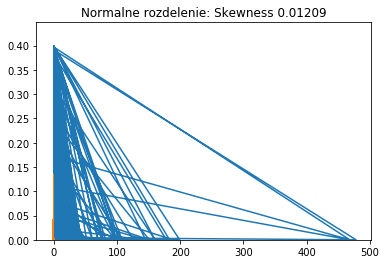

In [50]:
norm = stats.norm(0, 1)
sample = norm.rvs(len(data_other['TSH']))

plt.plot(data_other['TSH'], norm.pdf(data_other['TSH']))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

### Zobrazenie zavislosti medzi atributmy T4U, T3 a TSH

/Users/edvin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/edvin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/edvin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


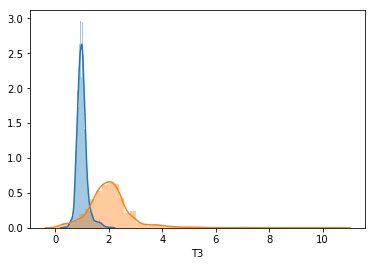

In [51]:
sns.distplot(data_other['T4U'].dropna())
sns.distplot(data_other['T3'].dropna())

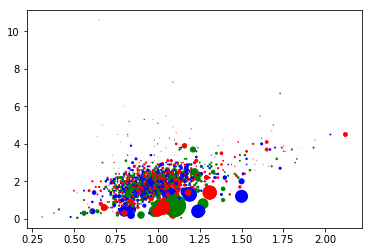

In [124]:
plt.scatter(data_other['T4U'], data_other['T3'], data_other['TSH'], c=['b', 'r', 'g'])

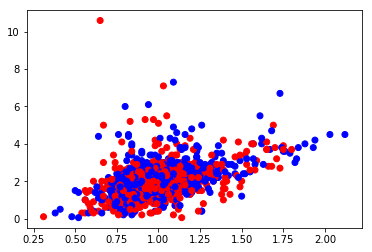

In [125]:
plt.scatter(data_other['T4U'], data_other['T3'], c=['b', 'r'])

### Prezrieme si ako silno koreluju atributy medzi sebou

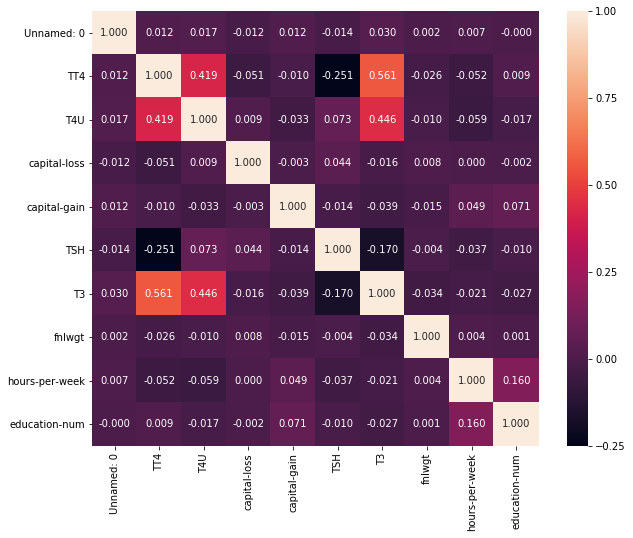

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_other.corr(), ax=ax, annot=True, fmt=".3f")

#### Z nasledovneho grafu jasno vidiet zavislosti medzi atributmy T3, T4U, A TT4

In [79]:
data_other['I131 treatment'].value_counts()

f      2239
t        38
f.6       1
Name: I131 treatment, dtype: int64

Premapovat na binarne hodnoty

In [80]:
data_other['goitre'].value_counts()

f       2259
t         22
f.10       1
Name: goitre, dtype: int64

Premapovat na binarne hodnoty

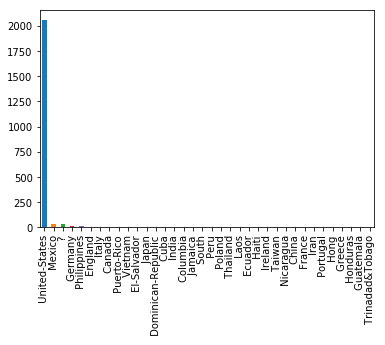

In [157]:
data_other['native-country'].value_counts().plot(kind='bar')

Vidime ze vacsina pacientov je zo spojenych statov

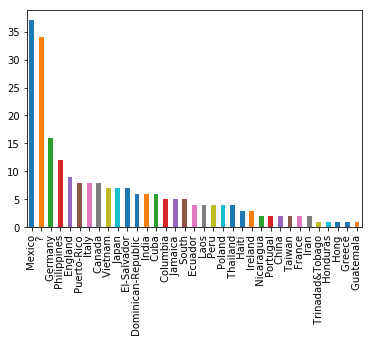

In [156]:
data_other[data_other['native-country'] != ' United-States']['native-country'].value_counts().plot(kind='bar')

#### Trimnut vsetky stringy

In [105]:
data_other['T3 measured'].value_counts()

t      1797
f       476
t.1       1
Name: T3 measured, dtype: int64

Premapovat na binarne hodnoty

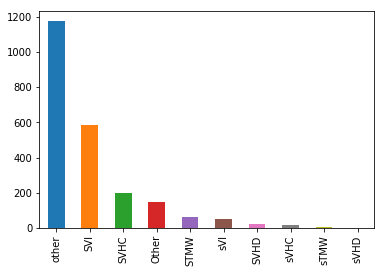

In [108]:
data_other['referral source'].value_counts().plot(kind='bar')

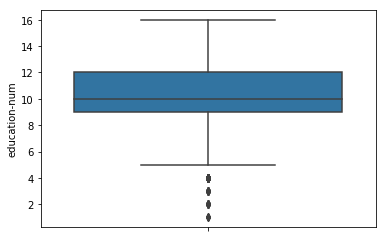

In [109]:
sns.boxplot(y="education-num", data=data_other)

Odstranit outlayeri

In [113]:
data_other['occupation'].value_counts()

 Adm-clerical         390
 Other-service        378
 Prof-specialty       308
 Exec-managerial      257
 Sales                238
 ?                    161
 Craft-repair         154
 Machine-op-inspct    127
 Handlers-cleaners     60
 Tech-support          54
 Transport-moving      53
 Farming-fishing       44
 Protective-serv       34
 Priv-house-serv       21
Name: occupation, dtype: int64

Doplnit chybajuce hodnoty vymenovanymi metodamy

In [114]:
data_other['TBG measured'].value_counts()

f       2275
f.14       1
Name: TBG measured, dtype: int64

In [115]:
data_other['TBG'].value_counts()

?    2280
Name: TBG, dtype: int64

### - Atributy 'TGB measured' a 'TGB' mozme vyhodit?

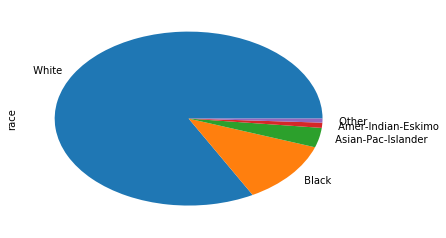

In [118]:
data_other['race'].value_counts().plot(kind='pie')

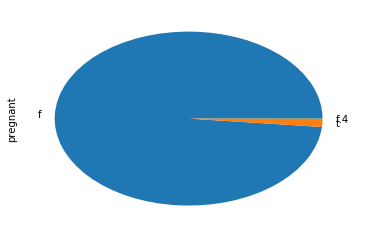

In [119]:
data_other['pregnant'].value_counts().plot(kind='pie')